In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
data = pd.read_csv("E:\DATA ANALYST\Statistics for Data Science\Probability-Distributions\modified_c4_epa_air_quality.csv")

In [5]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [7]:
data.shape

(260, 8)

<Axes: >

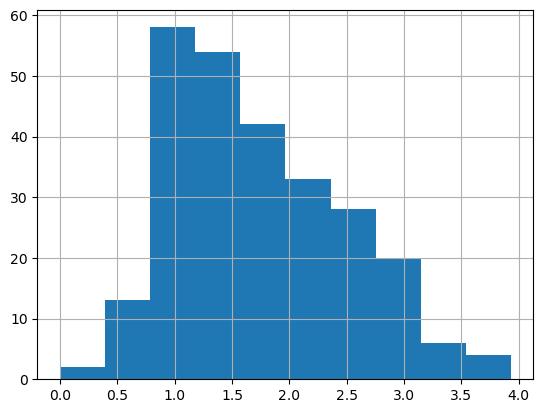

In [9]:
data['aqi_log'].hist()

#### There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

#### Now we use the empirical rule to observe the data, then test and verify that it is normally distributed.

#### 68% of the data fall within 1 standard deviation of the mean
#### 95% of the data fall within 2 standard deviations of the mean
#### 99.7% of the data fall within 3 standard deviations of the mean

In [14]:
mean_aqi_log = data['aqi_log'].mean()
print(mean_aqi_log)

1.7669210929985582


In [16]:
std_aqi_log = data["aqi_log"].std()
print(std_aqi_log)


0.7147155520223721


In [18]:
# Define variable for lower limit, 1 standard deviation below the mean.

lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.

upper_limit = mean_aqi_log + 1 * std_aqi_log

print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [20]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100


76.15384615384615

In [22]:
# Define variable for lower limit, 2 standard deviations below the mean.

lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.

upper_limit = mean_aqi_log + 2 * std_aqi_log

print(lower_limit, upper_limit)


0.3374899889538139 3.1963521970433026


In [24]:
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

In [26]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit = mean_aqi_log + 3 * std_aqi_log

print(lower_limit, upper_limit)


-0.37722556306855815 3.9110677490656744


In [28]:
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

### Z-score to find outliers

In [31]:
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1)
data.head()


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [33]:
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044
